## Enny's Super Store EDA Project

#### by Group 1


#### The Problem Statement
 “How to Increase Business Revenue of Enny’s Super Stores?"
 
 #### Project Description
Enny’s Super Stores operating within the US has given us (GROUP 1) the task to identify what works best for them in terms of sales and making profit. Using exploratory data analysis (EDA) we will help them identify:

1. Their most and least profitable product categories
2. Segment analysis of sales and profit
3. Geographical analysis of sales and profit.

Given the insights gained from the EDA, the superstore can choose to remove non-profitable products or invest in marketing efforts for products, segments and geographical areas that are driving their profit.


In [28]:
#importation of libaries to work with
import pandas as pd
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Inspection

In [2]:
#load data file
super_store = pd.read_csv(r'Super_Store_Data.csv')

In [3]:
#It is best practice to make a copy of the original Dataframe for reference purpose since changes will be made during cleaning.
#the copied datafram will be used through out the EDA

super_store1 = super_store.copy()
super_store1.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


#### Knowing the Data Set
The data set for this project was obtained online from kaggle.

It is an e-commerce data set of sales and shipping transactions between 2014 and 2017. It contains information such as Order Id, Order Date, Shipping date, Shipping mode, Customer name, Region, States, Sales, Quantity, Profit, etc.


In [123]:
#Converting to date time
super_store1["Order Date"], super_store1["Ship Date"] = pd.to_datetime(super_store1["Order Date"]), pd.to_datetime(super_store1["Ship Date"])

print(f"""The data from this particular store spans over {(super_store1['Order Date'].max() - super_store1['Order Date'].min()).days} days with sales totaling at ${super_store1['Sales'].sum() :,.0f} and a profit of ${super_store1['Profit'].sum() :,.0f}.
There are {super_store1['Product ID'].nunique()} unique articles in their inventory which are divided into {super_store1['Category'].nunique()} categories, all of which are being sold across {super_store1["State"].nunique()} states in the US.""")

The data from this particular store spans over 1457 days with sales totaling at $2,297,201 and a profit of $286,397.
There are 1862 unique articles in their inventory which are divided into 3 categories, all of which are being sold across 49 states in the US.


#### MetaData

Row ID => Unique ID for each row.

Order ID => Unique Order ID for each Customer.

Order Date => Order Date of the product.

Ship Date => Shipping Date of the Product.

Ship Mode=> Shipping Mode specified by the Customer.

Customer ID => Unique ID to identify each Customer.

Customer Name => Name of the Customer.

Segment => The segment where the Customer belongs.

Country => Country of residence of the Customer.

City => City of residence of of the Customer.

State => State of residence of the Customer.

Postal Code => Postal Code of every Customer.

Region => Region where the Customer belong.

Product ID => Unique ID of the Product.

Category => Category of the product ordered.

Sub-Category => Sub-Category of the product ordered.

Product Name => Name of the Product.

Sales => Sales of the Product.

Quantity => Quantity of the Product.

Discount => Discount provided.

Profit => Profit/Loss incurred.

In [4]:
#using the head() method to view the first few rows of the data in super_store

super_store.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [5]:
#using the tail() method to view the last few rows of the data in super_store

super_store.tail(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4,0.0,13.320
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.16,2,0.0,72.948


#### Understanding the data
An introductory step is to look at the content of the data to get an idea of what we're going to be dealing with

#### What is/are the main feature(s) (Fact columns) of interest in your dataset?

Sales 

Quantity

Discount

Profit


#### What features in the dataset do you think will help support your investigation into your feature(s) of interest (Description columns)?
Ship mood

Segments

Category

Customer name

Region

State

In [6]:
 # .shape() tells us the Number of Row and Columns of the dataset

super_store1.shape       

(9994, 21)

In [7]:
#List of Column names

super_store1.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
super_store1.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

### Data Cleaning

In [9]:
#Removing redundant column
# Since there is an implicit indexing, the first column 'Row ID' is not needed, drop row using .drop()

super_store1.drop('Row ID',axis=1,inplace=True)
super_store1.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [10]:
#Checking for missing data in the data set.

super_store1.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [124]:
#There is one duplicated entry in the dataset. Let's check it out
super_store1[super_store1.duplicated()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3406,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [125]:
# this duplicate could be an entry error, so We'll drop it
super_store1 = super_store1.drop_duplicates()

In [225]:
#creating new column Year and Month from the Order date for further visualizations 
#Year column
super_store1['Year'] = super_store1['Order Date'].dt.year

In [226]:
#Month column
super_store1['Month'] = super_store1['Order Date'].dt.month

In [228]:
#changed the dtype of the new columns to objects for further manipulations
super_store1['Year'] = super_store1['Year'].astype(str)
super_store1['Month'] = super_store1['Month'].astype(str)

In [238]:
#Created a combination of the Year and Month column and called it Date. 
#where 'Order Date' is needed for visualization, 'Date' will be used.

super_store1['Date'] = super_store1.Year +' ' + super_store1.Month

In [11]:
# Checking the data general information

super_store1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount

In [12]:
#Column 'Postal Code' is an Int but since it is not a measure, it should be a string
#convert Int to Str

super_store1['Postal Code'] = super_store1['Postal Code'].astype(str)

In [242]:
#converting floats to int for Sales and Profit columns
super_store1['Sales'] = super_store1['Sales'].astype(int)
super_store1['Profit'] = super_store1['Profit'].astype(int)

In [243]:
#confirmation of the datatype changes that was made

super_store1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9993 non-null   object        
 1   Order Date     9993 non-null   datetime64[ns]
 2   Ship Date      9993 non-null   datetime64[ns]
 3   Ship Mode      9993 non-null   object        
 4   Customer ID    9993 non-null   object        
 5   Customer Name  9993 non-null   object        
 6   Segment        9993 non-null   object        
 7   Country        9993 non-null   object        
 8   City           9993 non-null   object        
 9   State          9993 non-null   object        
 10  Postal Code    9993 non-null   object        
 11  Region         9993 non-null   object        
 12  Product ID     9993 non-null   object        
 13  Category       9993 non-null   object        
 14  Sub-Category   9993 non-null   object        
 15  Product Name   9993 n

#### Univariate Analysis

In [244]:
# Statistical Summary of the data

super_store1.describe()

,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000
mean,229.262784,3.789753,0.156188,28.339338
std,623.252399,2.225149,0.206457,234.158738
min,0.000000,1.000000,0.000000,-6599.000000
25%,17.000000,2.000000,0.000000,1.000000
50%,54.000000,3.000000,0.200000,8.000000
75%,209.000000,5.000000,0.200000,29.000000
max,22638.000000,14.000000,0.800000,8399.000000


In [152]:
# View of distributions within the columns

# creating a fuction for ploting my histigram for univariate plots.
def hist_plot(df,x_value,bin):
    '''
    The function accept 3 varables.
    
    df: the data frame
    
    x_value: the x value to plot
    
    bin: the bin size one need for ploting
    
    '''
    # setting the fig size for ploting
    plt.figure(figsize = [6, 3])
    # ploting the function with .hist
    plt.hist(data = df, x = x_value, bins = bin);
    # setting the title for the data set
    plt.title(f'''{x_value} distribution'''.title(),fontsize=13,weight=("bold"))
    # setting the y label
    plt.ylabel('Count'.title(),fontsize=10,weight=("bold"))
    # setting the x label
    plt.xlabel(x_value.title(),fontsize=10,weight=("bold"))

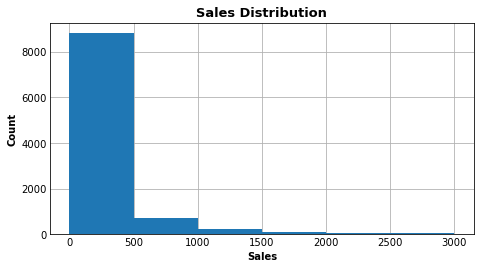

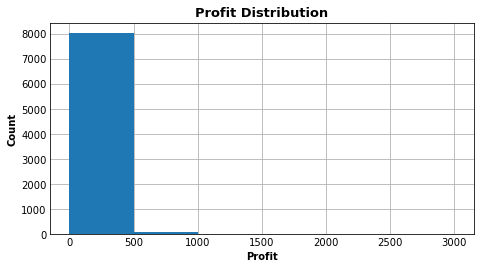

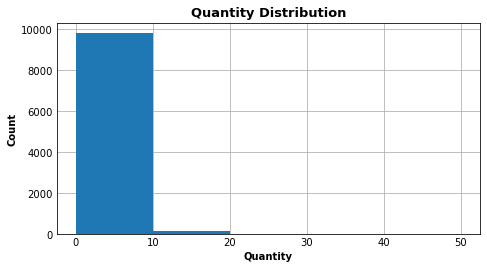

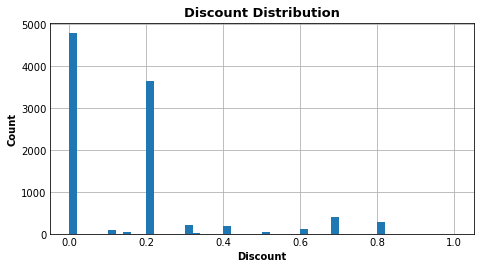

In [249]:
# plotting the fact values with the function
hist_plot(super_store1,'Sales',bin = np.arange(0, 3000+500, 500))
hist_plot(super_store1,'Profit',bin = np.arange(0, 3000+500, 500))
hist_plot(super_store1,'Quantity',bin = np.arange(0, 50+10, 10))
hist_plot(super_store1,'Discount',bin = np.arange(0, 1.0+0.02, 0.02))

Sales: Most sales per purchase were between 0 and 500  
Quantity: Highest quantity of products bought per purchase was between 0 and 10

Discount: Most discounted rate was between 0 and 0.1  (this could mean that must customers weren't given discounts)

Profit: Highest generated profit per sales was between 0 & 500

In [166]:
# creating a function for ploting our count plot with x variable.

def count_yplot(df,y_value,color= sns.color_palette()[0],order=None):
    '''
    The function accept 3 varables.
    
    df: the data frame
    
    y_value: the y value to plot
    
    order: order of the value
    
    '''
    # setting the fig size for ploting
    plt.figure(figsize = [5, 3])
    # ploting the function with .hist
    sns.countplot(data = df, y = y_value, edgecolor='black',color=color,order=order );
    # setting the title for the data set
    plt.title(f'''{y_value} distribution'''.title(),fontsize=13,weight=("bold"))
    # setting the y label
    plt.xlabel('Count'.title(),fontsize=10,weight=("bold"))
    # setting the x label
    plt.ylabel(y_value.title(),fontsize=10,weight=("bold"))

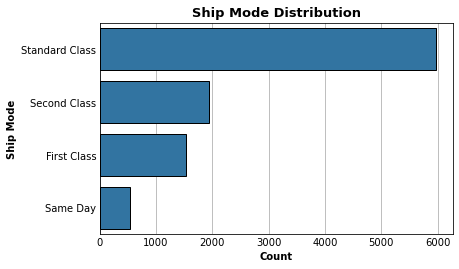

In [167]:
# ploting a distribution count for ship mode using the count_yplot function

# creating an order for the plot 
orders=super_store1['Ship Mode'].value_counts().index
# using the y function to plot the distribution
count_yplot(super_store1,'Ship Mode',order=orders)

From the chart, we can see that Customers used the "Standard Class" Ship mode most (almost 6000 transactions)

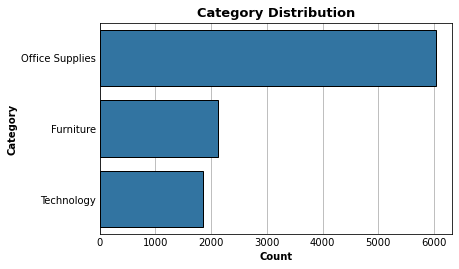

In [149]:
# ploting a distribution count for Category using the count_yplot function

# creating an order for the plot 
orders=super_store1['Category'].value_counts().index
# using the y function to plot the distribution
count_yplot(super_store1,'Category',order=orders)

From the chart, we can see that the Product Category "Office Supplies" were sold most (6000 sales transactions)

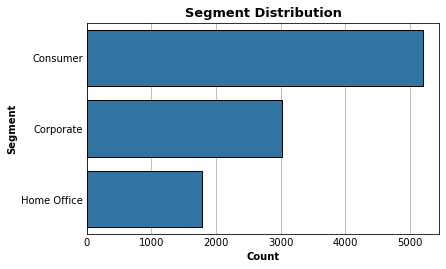

In [147]:
# ploting a distribution count for segment using the count_yplot function

# creating an order for the plot 
orders=super_store1['Segment'].value_counts().index
# using the y function to plot the distribution
count_yplot(super_store1,'Segment',order=orders)

From the chart, we can see that the highest patronage of the store was from the "Consumer" Segment (>5000, about70%)

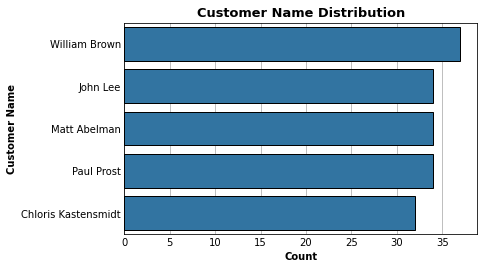

In [161]:
# ploting a distribution count for Customer name using the count_yplot function

# creating an order for the plot 
orders=super_store1['Customer Name'].value_counts().index[:5]
# using the y function to plot the distribution
count_yplot(super_store1,'Customer Name',order=orders)

From the chart, we can see that Customer "William Brown" carried out the most transactions in the store (> 35 transactions). This will be really clearer when related to the discount rates

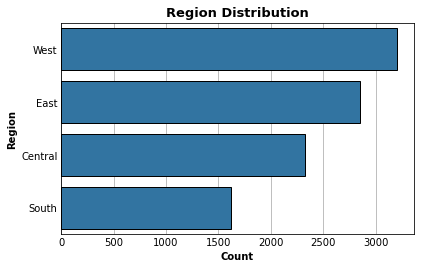

In [148]:
# ploting a distribution count for Region using the count_yplot function

# creating an order for the plot 
orders=super_store1['Region'].value_counts().index
# using the y function to plot the distribution
count_yplot(super_store1,'Region',order=orders)

From the chart, we can see that "West Region" carried out the most transactions in the store (> 3000 transactions)

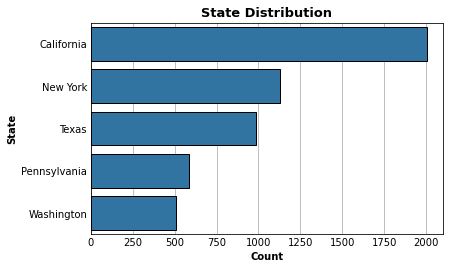

In [159]:
# ploting a distribution count for State using the count_yplot function

# creating an order for the plot 
orders=super_store1['State'[:5]].value_counts().index[:5]
# using the y function to plot the distribution
count_yplot(super_store1,'State',order=orders)

From the chart, we can see that State "California" carried out the highest transactions in the store (2000 transactions)

#### Bivariate Analysis

To achieve the above stated objectives, some questions have to be answered, like:


In [ ]:
#1.	What is the profit trend of the business from 2014-2017?

In [357]:
#Total Profit per Year
profit_Yr = super_store1.groupby('Year').Profit.sum()
profit_Yr

Year
2014    48925
2015    60945
2016    80955
2017    92370
Name: Profit, dtype: int32

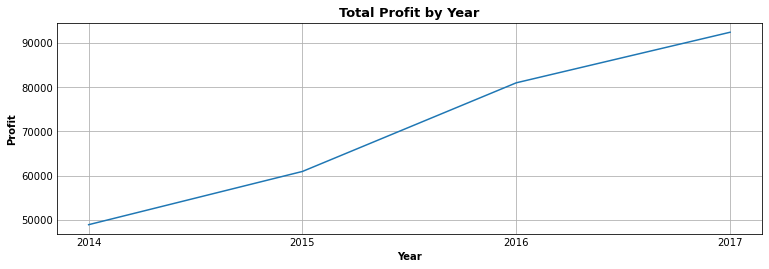

In [348]:
#plotting
plt.figure(figsize = [10,3])
sns.lineplot(x = profit_Yr.index, y = profit_Yr)

# setting the title for the data set
plt.title('Total Profit by Year', fontsize=13,weight=("bold"))
# setting the y label
plt.xlabel('Year', fontsize=10,weight=("bold"))
# setting the x label
plt.ylabel('Profit', fontsize=10,weight=("bold"))

plt.show()

An Increased Profit Trend is observed with highest Profit generated at 2017.

In [330]:
#Let's deep in further to see the profit trend along with the months
#creating a pivot profit trend of the business by year and month
pivot = super_store1.groupby(['Year','Month']).Profit.sum().astype(int)
#display the pivot
pivot

Year  Month
2014  1         2425
      10        3399
      11        9195
      12        8901
      2          853
      3          451
      4         3448
      5         2694
      6         4932
      7         -882
      8         5262
      9         8247
2015  1        -3295
      10        2772
      11       12377
      12        7896
      2         2795
      3         9682
      4         4139
      5         4616
      6         3290
      7         3246
      8         5308
      9         8119
2016  1         2793
      10       16176
      11        3890
      12       17760
      2         4970
      3         3572
      4         2919
      5         8596
      6         4681
      7         4369
      8         2016
      9         9213
2017  1         7096
      10        9199
      11        9557
      12        8325
      2         1581
      3        14658
      4          881
      5         6268
      6         8147
      7         6874
      8         8952
 

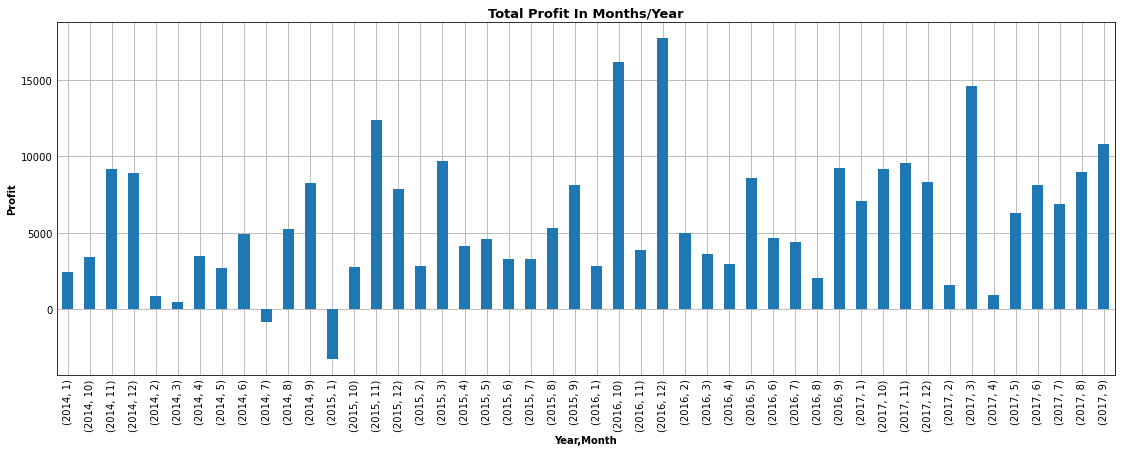

In [347]:
#plot the pivot table
pivot.plot.bar(figsize=(15,5))  #we use figsize parameter to set the height and width of the chart
plt.ticklabel_format(style='plain',axis='y') #write out the prices on y axis in full not scientific notation

# setting the title for the data set
plt.title('Total Profit In Months/Year', fontsize=13,weight=("bold"))
# setting the y label
plt.xlabel('Year,Month', fontsize=10,weight=("bold"))
# setting the x label
plt.ylabel('Profit', fontsize=10,weight=("bold"))

plt.show()

More Profits were generated towards the end of the year (October, November and December), except for 2017 which highest Profit was generated at Month March. There were also months which the business was at a loss (July 2014 and January 2015).

In [ ]:
#2.	What shipping mode is mostly used?

In [358]:
#Profit by Shipping mode 
shipping_mode = super_store1.groupby('Ship Mode').Profit.sum()
shipping_mode

Ship Mode
First Class        48474
Same Day           15707
Second Class       56759
Standard Class    162255
Name: Profit, dtype: int32

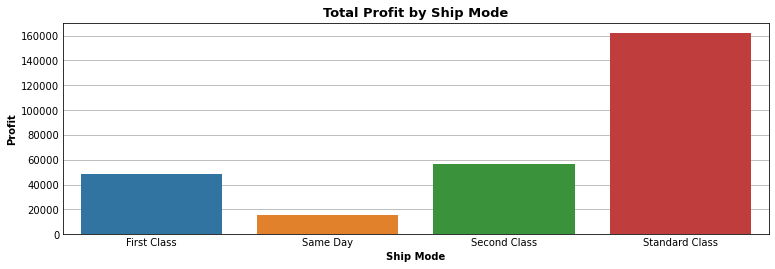

In [346]:
#plotting
plt.figure(figsize = [10,3])
sns.barplot(x = shipping_mode.index, y = shipping_mode)
# setting the title for the data set
plt.title('Total Profit by Ship Mode', fontsize=13,weight=("bold"))
# setting the y label
plt.xlabel('Ship Mode', fontsize=10,weight=("bold"))
# setting the x label
plt.ylabel('Profit', fontsize=10,weight=("bold"))

plt.show()

'Standard Class' is used most by customers for Shipping their orders and it generated over $160000

In [ ]:
#3.	What product category generates highest revenue?

In [356]:
#Profit by Product Category
category = super_store1.groupby('Category').Profit.sum()
category



Category
Furniture           18138
Office Supplies    120363
Technology         144694
Name: Profit, dtype: int32

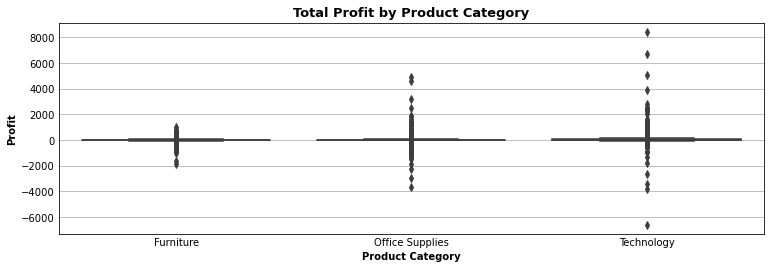

In [359]:
#plotting
plt.figure(figsize = [10,3])
sns.boxplot(x='Category', y='Profit', data=super_store1)

# setting the title for the data set
plt.title('Total Profit by Product Category', fontsize=13,weight=("bold"))
# setting the y label
plt.xlabel('Product Category', fontsize=10,weight=("bold"))
# setting the x label
plt.ylabel('Profit', fontsize=10,weight=("bold"))

plt.show()

Products in the Category 'Technology' generated highest profits for the store

In [ ]:
#4.	What Customer Segment generates highest revenue?

In [361]:
#Profit by Segment
segment = super_store1.groupby('Segment').Profit.sum()
segment

Segment
Consumer       132476
Corporate       90999
Home Office     59720
Name: Profit, dtype: int32

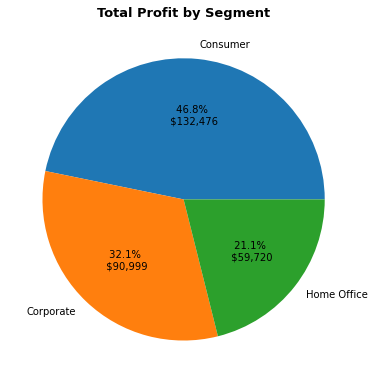

In [377]:
#Plotting
plt.figure(figsize=(5,5))
plt.pie(segment,labels=segment.index,autopct= lambda p: f"{p: .1f}% \n ${p*np.sum(segment)/100 :,.0f}")

# setting the title for the data set
plt.title('Total Profit by Segment', fontsize=13,weight=("bold"))

plt.show()

'Consumer' Segment perform over 46% of the transactions in the store and hence generated highest profit for the store.

In [ ]:
#5.	Is discount rate dependent on customers’ sales value?

In [428]:
#Each Customer's discount rate (Top 5 rates)
discount_custo = super_store1.groupby('Customer Name').Discount.sum().sort_values(ascending = False)
discount_custo[:5]


Customer Name
Zuschuss Carroll       7.9
William Brown          7.6
Chloris Kastensmidt    7.5
Erin Ashbrook          7.5
Lena Cacioppo          7.2
Name: Discount, dtype: float64

In [429]:
#Each Customer's Sales (Top 5)
custo_sales = super_store1.groupby('Customer Name').Sales.sum().sort_values(ascending = False)
custo_sales[:5]

Customer Name
Sean Miller      25035
Tamara Chand     19046
Raymond Buch     15107
Tom Ashbrook     14589
Adrian Barton    14460
Name: Sales, dtype: int32

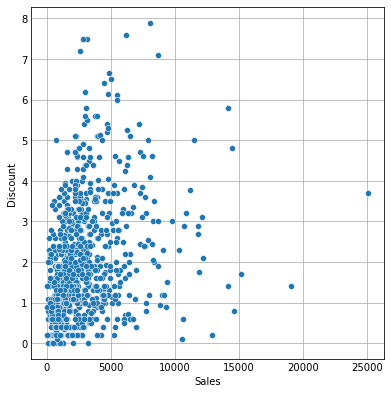

In [527]:
#Plotting the relationship between sales and discount
plt.figure(figsize = [5,5])
sns.scatterplot(x = custo_sales, y = discount_custo)
plt.show()

There is no correlation between Sums of Sales and Discount. Nevertheless, it can be save to say that discount is given based on a single purchase value.

In [ ]:
#6.	What State and Region has the highest profit generation?

In [490]:
# Profit by States
Top_10_states = super_store1.groupby('State').Profit.sum().sort_values(ascending = True)[39:]

Bottom_10_states = super_store1.groupby('State').Profit.sum().sort_values(ascending = False)[39:]

print(Top_10_states, Bottom_10_states)

State
Delaware       9927
Minnesota     10772
Kentucky      11128
Georgia       16153
Indiana       18310
Virginia      18488
Michigan      24334
Washington    33160
New York      73506
California    75466
Name: Profit, dtype: int32 State
Oregon            -1212
Arizona           -3458
Florida           -3462
Tennessee         -5363
Colorado          -6543
North Carolina    -7550
Illinois         -12611
Pennsylvania     -15574
Ohio             -16988
Texas            -25749
Name: Profit, dtype: int32


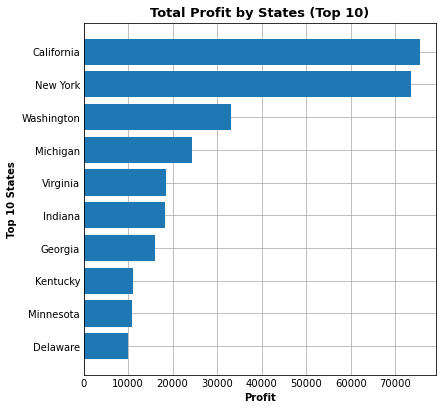

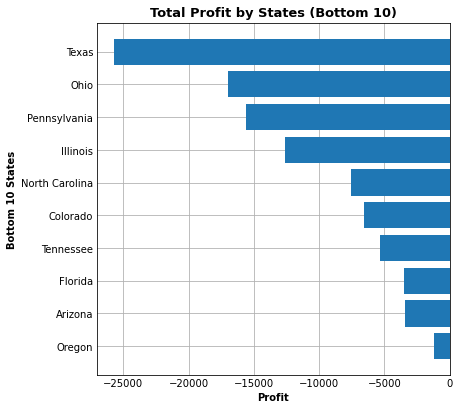

In [521]:
#Plotting Top 10 States
plt.figure(figsize = (5,5))
plt.barh(y= Top_10_states.index, width = Top_10_states);

# setting the title for the data set
plt.title('Total Profit by States (Top 10)', fontsize=13,weight=("bold"))
# setting the y label
plt.xlabel('Profit', fontsize=10,weight=("bold"))
# setting the x label
plt.ylabel('Top 10 States', fontsize=10,weight=("bold"))


#Plotting Bottom 10 States
plt.figure(figsize = (5,5))
plt.barh(y= Bottom_10_states.index, width = Bottom_10_states);

# setting the title for the data set
plt.title('Total Profit by States (Bottom 10)', fontsize=13,weight=("bold"))
# setting the y label
plt.xlabel('Profit', fontsize=10,weight=("bold"))
# setting the x label
plt.ylabel('Bottom 10 States', fontsize=10,weight=("bold"))

fig.tight_layout()

State "California" generates highest Net Profit, and State "Texas" makes no profit, It has the highest loss rate.

In [494]:
#Profit by Region
Region_profit = super_store1.groupby('Region').Profit.sum().sort_values(ascending = False)
Region_profit

Region
West       107114
East        90640
South       46198
Central     39243
Name: Profit, dtype: int32

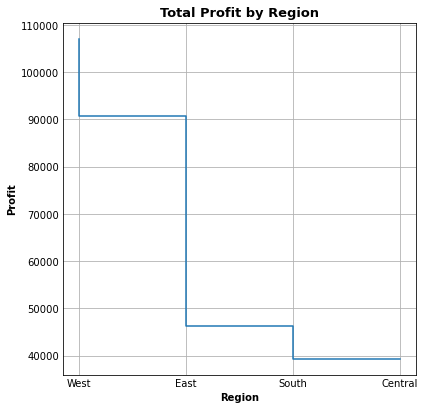

In [496]:
#Plotting 
plt.figure(figsize = (5,5))
plt.step(x= Region_profit.index, y = Region_profit);

# setting the title for the data set
plt.title('Total Profit by Region', fontsize=13,weight=("bold"))
# setting the y label
plt.xlabel('Region', fontsize=10,weight=("bold"))
# setting the x label
plt.ylabel('Profit', fontsize=10,weight=("bold"))

plt.show()


Region "West" generates highest Net Profit with Region "Central" having least Net profit generation.

#### Multivariate Analysis

In [ ]:
#Which Product Category Generates Revenue and Net Profit most across segments, sub-category, year, ship mode and state?

In [ ]:
# Let's compare out comes between Sales and Profit of Category per Segment

In [518]:
#Grouping by segment and category per Sales.
segment_and_category_S = super_store1.groupby(["Segment", "Category"], as_index=False).Sales.sum()

#Grouping by segment and category per Profit.
segment_and_category_P = super_store1.groupby(["Segment", "Category"], as_index=False).Profit.sum()

print(segment_and_category_S, segment_and_category_P)

       Segment         Category   Sales
0     Consumer        Furniture  390422
1     Consumer  Office Supplies  362201
2     Consumer       Technology  405707
3    Corporate        Furniture  228648
4    Corporate  Office Supplies  229663
5    Corporate       Technology  246056
6  Home Office        Furniture  121444
7  Home Office  Office Supplies  123830
8  Home Office       Technology  183052        Segment         Category  Profit
0     Consumer        Furniture    6844
1     Consumer  Office Supplies   55231
2     Consumer       Technology   70401
3    Corporate        Furniture    7480
4    Corporate  Office Supplies   39573
5    Corporate       Technology   43946
6  Home Office        Furniture    3814
7  Home Office  Office Supplies   25559
8  Home Office       Technology   30347


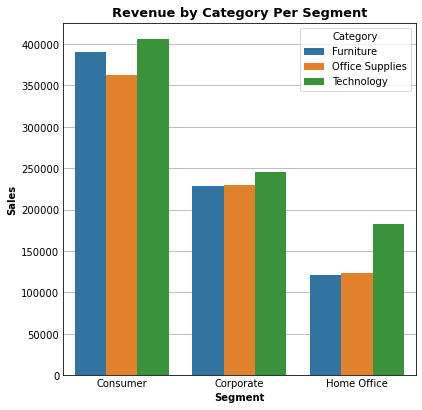

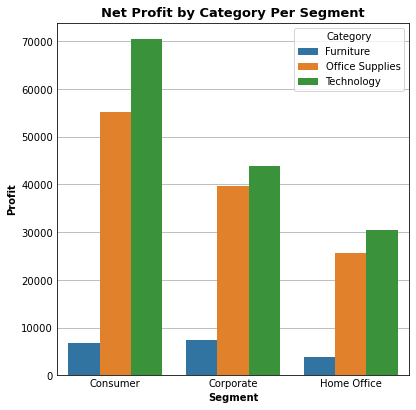

In [524]:
#Plotting the profit per segment and using the category as hue to show the division of sales between the categories.
plt.figure(figsize = [5,5])
sns.barplot(x=segment_and_category_S["Segment"], y=segment_and_category_S["Sales"], hue=segment_and_category_S["Category"])

# setting the title for the data set
plt.title('Revenue by Category Per Segment', fontsize=13,weight=("bold"))
# setting the y label
plt.xlabel('Segment', fontsize=10,weight=("bold"))
# setting the x label
plt.ylabel('Sales', fontsize=10,weight=("bold"))


#Plotting the profit per segment and using the category as hue to show the division of profit between the categories.
plt.figure(figsize = [5,5])
sns.barplot(x=segment_and_category_P["Segment"], y=segment_and_category_P["Profit"], hue=segment_and_category_P["Category"])

# setting the title for the data set
plt.title('Net Profit by Category Per Segment', fontsize=13,weight=("bold"))
# setting the y label
plt.xlabel('Segment', fontsize=10,weight=("bold"))
# setting the x label
plt.ylabel('Profit', fontsize=10,weight=("bold"))

fig.tight_layout()

Segment "Consumer" made the highest purchase, with Product Category "Technology" genenerating highest Revenue and Net Profit, though Product Category "Furniture" generate more revenue compared to "Office Supplies, It generated the least Net Profit.

In [ ]:
# Let's compare out comes between Sales and Profit of Category per Sub-Category

In [523]:
#Grouping by product subcategory and category per Sales.
subcat_and_category_S = super_store1.groupby(["Sub-Category", "Category"], as_index=False).Sales.sum()

#Grouping by product subcategory and category per Profit.
subcat_and_category_P = super_store1.groupby(["Sub-Category", "Category"], as_index=False).Profit.sum()

print(subcat_and_category_S, subcat_and_category_P)

   Sub-Category         Category   Sales
0   Accessories       Technology  166856
1    Appliances  Office Supplies  107266
2           Art  Office Supplies   26685
3       Binders  Office Supplies  202593
4     Bookcases        Furniture  114728
5        Chairs        Furniture  327816
6       Copiers       Technology  149462
7     Envelopes  Office Supplies   16326
8     Fasteners  Office Supplies    2914
9   Furnishings        Furniture   91172
10       Labels  Office Supplies   12294
11     Machines       Technology  189155
12        Paper  Office Supplies   77675
13       Phones       Technology  329342
14      Storage  Office Supplies  223368
15     Supplies  Office Supplies   46573
16       Tables        Furniture  206798    Sub-Category         Category  Profit
0   Accessories       Technology   41588
1    Appliances  Office Supplies   17980
2           Art  Office Supplies    6124
3       Binders  Office Supplies   30088
4     Bookcases        Furniture   -3478
5        Chairs 

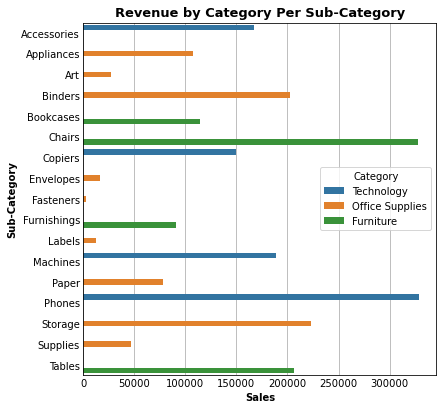

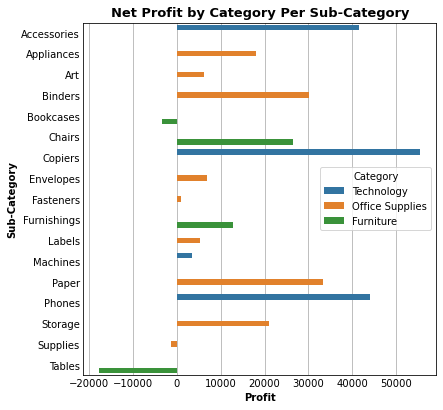

In [525]:
#Plotting the profit per subcategory and using the category as hue to show the division of sales between the categories.
plt.figure(figsize = [5,5])
sns.barplot(y=subcat_and_category_S["Sub-Category"], x=subcat_and_category_S["Sales"], hue=subcat_and_category_S["Category"])

# setting the title for the data set
plt.title('Revenue by Category Per Sub-Category', fontsize=13,weight=("bold"))
# setting the y label
plt.xlabel('Sales', fontsize=10,weight=("bold"))
# setting the x label
plt.ylabel('Sub-Category', fontsize=10,weight=("bold"))


#Plotting the profit per subcategory and using the category as hue to show the division of profit between the categories.
plt.figure(figsize = [5,5])
sns.barplot(y=subcat_and_category_P["Sub-Category"], x=subcat_and_category_P["Profit"], hue=subcat_and_category_P["Category"])

# setting the title for the data set
plt.title('Net Profit by Category Per Sub-Category', fontsize=13,weight=("bold"))
# setting the y label
plt.xlabel('Profit', fontsize=10,weight=("bold"))
# setting the x label
plt.ylabel('Sub-Category', fontsize=10,weight=("bold"))

fig.tight_layout()

Further splitting the Product category, "Copiers", generated the most revenue in the Technology Category and overall, and "Tables and Bookcases" under the Furniture category generated losses.

In [ ]:
#Let's discovered which Product Category Saled and yield highest Profit in each year

In [535]:
#Grouping by product year and category per Sales.
year_and_category_S = super_store1.groupby(["Year", "Category"], as_index=False).Sales.sum()

#Grouping by product year and category per Profit.
year_and_category_P = super_store1.groupby(["Year", "Category"], as_index=False).Profit.sum()

print(year_and_category_S, year_and_category_P)

    Year         Category   Sales
0   2014        Furniture  156676
1   2014  Office Supplies  151091
2   2014       Technology  175015
3   2015        Furniture  170261
4   2015  Office Supplies  136549
5   2015       Technology  162478
6   2016        Furniture  198587
7   2016  Office Supplies  183070
8   2016       Technology  226038
9   2017        Furniture  214990
10  2017  Office Supplies  244984
11  2017       Technology  271284     Year         Category  Profit
0   2014        Furniture    5408
1   2014  Office Supplies   22163
2   2014       Technology   21354
3   2015        Furniture    2933
4   2015  Office Supplies   24686
5   2015       Technology   33326
6   2016        Furniture    6876
7   2016  Office Supplies   34480
8   2016       Technology   39599
9   2017        Furniture    2921
10  2017  Office Supplies   39034
11  2017       Technology   50415


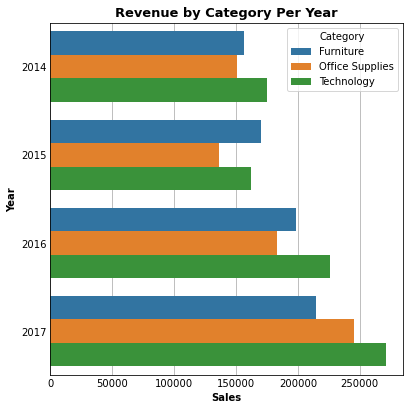

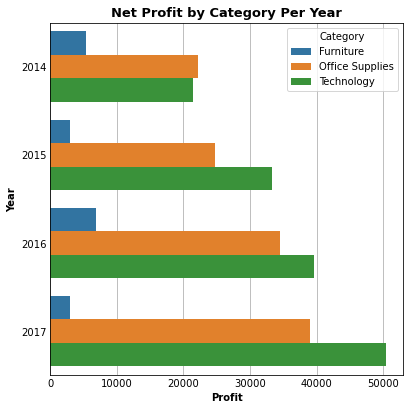

In [536]:
#Plotting the profit per year and using the category as hue to show the division of sales between the categories.
plt.figure(figsize = [5,5])
sns.barplot(y=year_and_category_S["Year"], x=year_and_category_S["Sales"], hue=year_and_category_S["Category"], ci = None)

# setting the title for the data set
plt.title('Revenue by Category Per Year', fontsize=13,weight=("bold"))
# setting the y label
plt.xlabel('Sales', fontsize=10,weight=("bold"))
# setting the x label
plt.ylabel('Year', fontsize=10,weight=("bold"))


#Plotting the profit per year and using the category as hue to show the division of profit between the categories.
plt.figure(figsize = [5,5])
sns.barplot(y=year_and_category_P["Year"], x=year_and_category_P["Profit"], hue=year_and_category_P["Category"], ci = None)

# setting the title for the data set
plt.title('Net Profit by Category Per Year', fontsize=13,weight=("bold"))
# setting the y label
plt.xlabel('Profit', fontsize=10,weight=("bold"))
# setting the x label
plt.ylabel('Year', fontsize=10,weight=("bold"))

fig.tight_layout()

Category "Technology" generated highest Revenue and Net Profit across the Years, except for 2015 where "Furniture" generated highest Sales, nevertheless, It still generated the least Net profit.

In [ ]:
# Let's compare out comes between Sales and Profit of Category per ship mode

In [ ]:
#Grouping by product ship mode and category per Sales.
year_and_category_S = super_store1.groupby(["Year", "Category"], as_index=False).Sales.sum()

#Grouping by product year and category per Profit.
year_and_category_P = super_store1.groupby(["Year", "Category"], as_index=False).Profit.sum()

print(year_and_category_S, year_and_category_P)

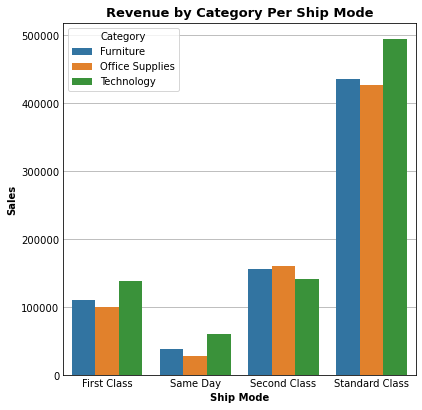

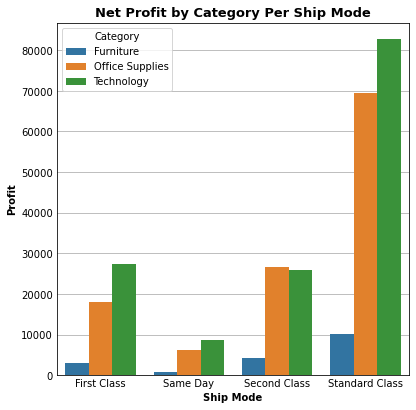

In [538]:
#Plotting the profit per ship mode and using the category as hue to show the division of sales between the categories.
plt.figure(figsize = [5,5])
sns.barplot(y=shipM_and_category_S["Sales"], x=shipM_and_category_S["Ship Mode"], hue=shipM_and_category_S["Category"], ci = None)

# setting the title for the data set
plt.title('Revenue by Category Per Ship Mode', fontsize=13,weight=("bold"))
# setting the y label
plt.xlabel('Ship Mode', fontsize=10,weight=("bold"))
# setting the x label
plt.ylabel('Sales', fontsize=10,weight=("bold"))


#Plotting the profit per ship mode and using the category as hue to show the division of profit between the categories.
plt.figure(figsize = [5,5])
sns.barplot(y=shipM_and_category_P["Profit"], x=shipM_and_category_P["Ship Mode"], hue=shipM_and_category_P["Category"], ci = None)

# setting the title for the data set
plt.title('Net Profit by Category Per Ship Mode', fontsize=13,weight=("bold"))
# setting the y label
plt.xlabel('Ship Mode', fontsize=10,weight=("bold"))
# setting the x label
plt.ylabel('Profit', fontsize=10,weight=("bold"))

fig.tight_layout()

In [ ]:
# Let's compare out comes between Sales and Profit of Category per State

In [557]:
#Grouping by product ship mode and category per Sales.
state_and_category_S = super_store1.groupby(["State", "Category"], as_index=False).Sales.sum().sort_values("Sales", ascending = False)[:10]

#Grouping by product year and category per Profit.
state_and_category_P = super_store1.groupby(["State", "Category"], as_index=False).Profit.sum().sort_values("Profit",ascending = False)[:10]

print(state_and_category_S, state_and_category_P)

          State         Category   Sales
11   California       Technology  159020
9    California        Furniture  155824
10   California  Office Supplies  141649
92     New York       Technology  127319
90     New York        Furniture   93237
91     New York  Office Supplies   89622
123       Texas       Technology   64982
121       Texas        Furniture   60489
135  Washington       Technology   50468
133  Washington        Furniture   47950           State         Category  Profit
92     New York       Technology   42068
10   California  Office Supplies   37148
11   California       Technology   29280
91     New York  Office Supplies   25655
135  Washington       Technology   14966
61     Michigan  Office Supplies   14926
134  Washington  Office Supplies   11047
38      Indiana       Technology   10984
28      Georgia  Office Supplies    9739
9    California        Furniture    9038


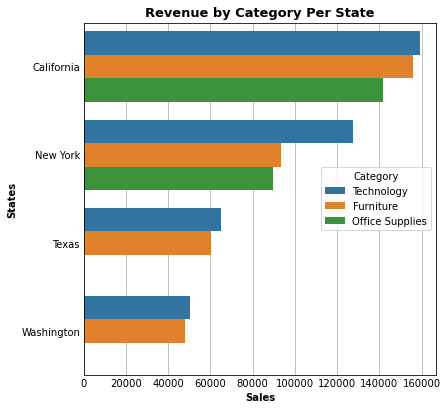

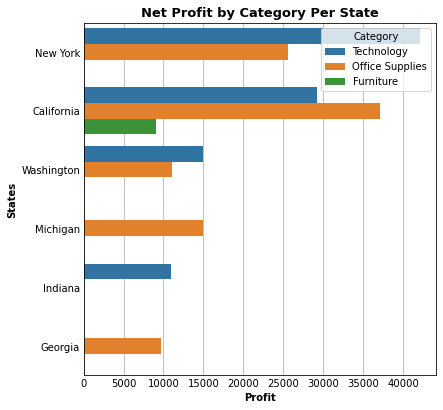

In [560]:
#Plotting the profit per state and using the category as hue to show the division of sales between the categories.
plt.figure(figsize = [5,5])
sns.barplot(y=state_and_category_S["State"], x=state_and_category_S["Sales"], hue=state_and_category_S["Category"], ci = None)

# setting the title for the data set
plt.title('Revenue by Category Per State', fontsize=13,weight=("bold"))
# setting the y label
plt.xlabel('Sales', fontsize=10,weight=("bold"))
# setting the x label
plt.ylabel('States', fontsize=10,weight=("bold"))


#Plotting the profit per state and using the category as hue to show the division of profit between the categories.
plt.figure(figsize = [5,5])
sns.barplot(y=state_and_category_P["State"], x=state_and_category_P["Profit"], hue=state_and_category_P["Category"], ci = None)

# setting the title for the data set
plt.title('Net Profit by Category Per State', fontsize=13,weight=("bold"))
# setting the y label
plt.xlabel('Profit', fontsize=10,weight=("bold"))
# setting the x label
plt.ylabel('States', fontsize=10,weight=("bold"))

fig.tight_layout()

Product Category 'Technology' generated highest revenue and net profit across the top 6 states, except for "California" where the highest Net profit was generated from 'Office Supplies'.

Text(0.5, 1.0, 'Correlations between Sales, Quantity, Profit and Discount')

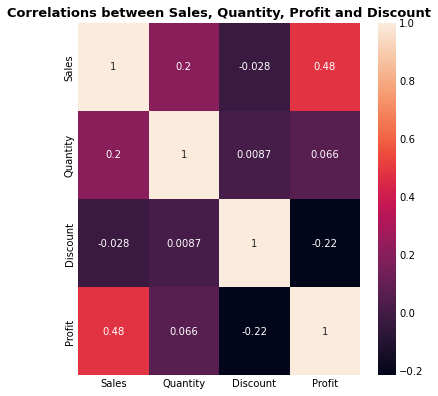

In [526]:
#view of relationships between column(sales,quantity, profit, discount)
plt.figure(figsize=(5,5))
sns.heatmap(super_store1.corr(),annot=True)
plt.title('Correlations between Sales, Quantity, Profit and Discount', fontsize=13,weight=("bold"))

In the dataset, It is observed that there is no strong relationship between variables, and the only medium relationship is between "Sales" and "Profit", meaning that, the raise in sales may lead to the raise in profit.

# Summary

In this markdown cell, summarize your list of findings.

1. 
2. 
3. 
4. 